   station        lat         lon
0        3  34.431667  135.197778
1        4  34.647222  135.276667
2        5  34.661389  135.367222
3        6  34.460556  135.326389
4       12  34.611667  135.378889
5       13  34.495000  135.345278


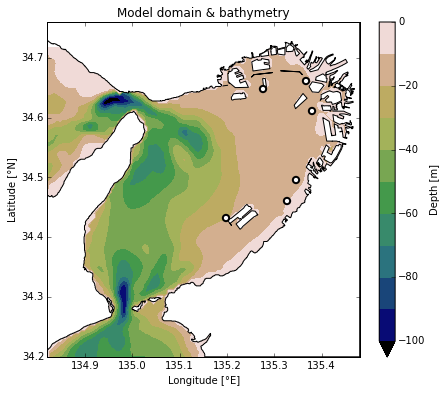

In [1]:
%matplotlib inline

import netCDF4
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import datetime

import romspy

def hview(ncfile, vname, cff=1.0, interval=None, vmax=None, vmin=None, cblabel=None, cmap='jet'):

    nc = netCDF4.Dataset(ncfile, 'r')
    x_rho = nc.variables['lon_rho'][0,:]-0.00449/2
    y_rho = nc.variables['lat_rho'][:,0]-0.00546/2
    ndim = len(nc.variables[vname].shape)
    if ndim is 2:
        var2d = nc.variables[vname][:,:] * cff
    else:
        ocean_time = nc.variables['ocean_time'][t]
        tunits = nc.variables['ocean_time'].units
        if ndim is 4:
            var2d = nc.variables[vname][t,k-1,:,:] * cff
        if ndim is 3:
            var2d = nc.variables[vname][t,:,:] * cff

    ax = plt.gca()
    X, Y = np.meshgrid(x_rho, y_rho)
    
    # contourf
    
    if interval is not None:
        interval = np.arange(vmin, vmax, interval)
        CF = ax.contourf(X+0.00449, Y+0.00546, var2d, interval, cmap=cmap, extend='min')
    cbar = plt.colorbar(CF)
    cbar.ax.set_ylabel(cblabel)

    # title
    
    if ndim is 2:
        plt.title('Model domain & bathymetry')
    else:
        dtime = netCDF4.num2date(ocean_time, units=tunits)
        plt.title(datetime.datetime.strftime(dtime,'%Y-%m-%d %H:%M:%S'))

ncfile = '/Users/teruhisa/Dropbox/Data/ob500_grd-v5.nc'
plt.figure(figsize=(7,6))
#hview(ncfile, vname='h', cff=-1, vmax=0.1, vmin=-100, interval=10, cmap='ocean', cblabel='Depth [m]')
hview(ncfile, vname='h', cff=-1, vmax=0.1, vmin=-100, interval=10, cmap='gist_earth', cblabel='Depth [m]')
romspy.basemap()
romspy.hplot_stations("/Users/teruhisa/Dropbox/Data/obs_stations_chl.csv")
plt.savefig('2015kaiko_grid.png', bbox_inches='tight')